# HR-аналитика: оптимизация управления персоналом

***Заголовок:*** Разработка прогнозных моделей машинного обучения по HR-аналитике для компании «Работа с заботой».

***Описание проекта:*** 
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


***Задачи исследования:***
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

***Описание данных:***

*Задача 1: предсказание уровня удовлетворённости сотрудника:*

Данные для первой задачи разделены на три части:
- тренировочная выборка: train_job_satisfaction_rate.csv;
- входные признаки тестовой выборки: test_features.csv;
- целевой признак тестовой выборки: test_target_job_satisfaction_rate.csv.

Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

*Задача 2: предсказание увольнения сотрудника из компании*

Для этой задачи можно использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

Данные для второй задачи также разделены на три части:
- тренировочная выборка: train_quit.csv;
- входные признаки тестовой выборки те же, что и в прошлой задаче: test_features.csv;
- целевой признак тестовой выборки: test_target_quit.csv.

***Краткий ход исследования***

**Задача 1:**

1. Загрузить и изучить данные;

2. Выполнить предобработку данных;

3. Провести исследовательский анализ;

4. Подготовить данные;

5. Обучить модели машинного обучения;

6. Оформить выводы

**Задача 2:**

7. Загрузить и изучить данные;

8.  Выполнить предобработку данных;

9. Провести исследовательский анализ данных;

10. Добавить новый входной признак;

11. ПОдготовить данные;

12. Обучить модель машинного обучения;

13. Сформулировать выводы;

14. Написать общий вывод.

# Задача 1: предсказание уровня удовлетворённости сотрудника

## Загрузка данных

Сначала установим необходимые библиотеки:

In [1]:
!pip install -q phik
!pip install -q shap
!pip install -q scikit-learn --upgrade

Далее импортируем библиотеки, необходимые для работы:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import phik
import shap
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor, DummyClassifier

Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:
- /datasets/train_job_satisfaction_rate.csv - train_job_sat;
- /datasets/test_features.csv - test_features;
- /datasets/test_target_job_satisfaction_rate.csv - test_target_job_sat.

Поменяем базовые индексы в датафрейме — сделаем индексами идентификаторы клиентов:

In [3]:
train_job_sat = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
train_job_sat = train_job_sat.set_index('id')

test_features = pd.read_csv('/datasets/test_features.csv')
test_features = test_features.set_index('id')

test_target_job_sat = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
test_target_job_sat = test_target_job_sat.set_index('id')

Проверим, что данные в таблицах соответствуют описанию. Выведем по одной случайной строке всех датафреймов:

In [4]:
train_job_sat.sample(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
681396,purchasing,junior,medium,1,no,no,4,22800,0.55


In [5]:
test_features.sample(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
826041,technology,junior,medium,2,no,no,5,32400


In [6]:
test_target_job_sat.sample(1)

,job_satisfaction_rate
id,
373681,0.41


Объединим test_features и test_target_job_sat в test_job_sat методом merge, используя индексы ('id'):

In [7]:
test_job_sat = test_features.merge(test_target_job_sat, on='id')

test_job_sat.sample()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
765110,purchasing,middle,medium,4,no,no,4,39600,0.68


Таким образом, представленные исходные данные соответствуют описанию.

## Предобработка данных

Проведём предобработку данных.

Для начала создадим  2 функции: 
- data_main_info, которая будет выводить общую информацию о каждом датафрейме с помощью методов: info() и head();
- data_preprocessing, которая будет определять количество пропущенных значений в каждом столбце и искать явные дубликаты:

In [8]:
def data_main_info(data):
       
    print(f'Общая информация:') 
    print(data.info())
    print()
    print(f'Первые пять строк таблицы:')
    display(data.head())

In [9]:
def data_preprocessing(data):
    print(f'Количество пропущенных значений в каждом столбце:')
    print(data.isna().sum())
    print()   
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')

Рассмотрим общую информацию о каждом датафрейме:

In [10]:
data_main_info(train_job_sat)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
None

Первые пять строк таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


В тренировочной выборке 4000 строк и 9 столбцов, а все типы данных соответствуют содержимому. Названия столбцов написаны по правилам синтаксиса.

Проверим данные на наличие пропусков и дубликатов:

In [11]:
data_preprocessing(train_job_sat)

Количество пропущенных значений в каждом столбце:
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Количество явных дубликатов: 245


В датафрейме 245 строк-дубликатов, что свидетельствует о повторении данных у разных пользователей. В столбцах 'dept' и 'level' имеются пропущенные значения. Посмотрим на них:

In [12]:
train_job_sat['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [13]:
train_job_sat['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

Пропущенные значения представляют собой NaN, и, как будет показано далее, в тестовых данных имеются пустые строки в качестве пропусков. 

Чтобы обработать такие пропущенные значения, создадим пайплайн preprocess_pipe, в котором с помощью инструмента SimpleImputer будем заменять NaN и ' ' на 'most_frequent':

In [14]:
preprocess_pipe = Pipeline(
    [
        (
            'simpleImputer_nan', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
        
            'simpleImputer_empty',
            SimpleImputer(missing_values=' ', strategy='most_frequent')
        )
        
    ]
)

Чтобы применить preprocess_pipe только к категориальным признакам, создадим список cat_cols:

In [15]:
cat_cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

Создадим таблицу train_cat_cols, которой передадим категориальные признаки датафрейма train_job_sat.

Применим к этой таблице пайплайн preprocess_pipe, чтобы заполнить пропускив категориальных признаках. Передадим таблице индексы датафрейма train_job_sat и выведем первые 5 строк на экран:

In [16]:
train_cat_cols = train_job_sat[cat_cols] 

train_cat_cols = pd.DataFrame(
    preprocess_pipe.fit_transform(train_cat_cols), 
    columns=preprocess_pipe.get_feature_names_out())

train_cat_cols = train_cat_cols.set_index(train_job_sat.index)

train_cat_cols.head()

,dept,level,workload,last_year_promo,last_year_violations
id,,,,,
155278,sales,junior,medium,no,no
653870,hr,junior,high,no,no
184592,sales,junior,low,no,no
171431,technology,junior,low,no,no
693419,hr,junior,medium,no,no


Перезапишем категориальные признаки train_job_sat данными из таблицы train_cat_cols и выведем первые 5 строк обновлённой тренировочной выборки:

In [17]:
train_job_sat[cat_cols] = train_cat_cols

train_job_sat.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


Снова проверим наличие пропущенных значений:

In [18]:
data_preprocessing(train_job_sat)

Количество пропущенных значений в каждом столбце:
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Количество явных дубликатов: 248


Теперь пропущенные значения отсутствуют, а количество явных дубликатов увеличилось на 3 до 248 строк. Удалим явные дубликаты:

In [19]:
train_job_sat = train_job_sat.drop_duplicates()

train_job_sat.duplicated().sum()

0

Далее посмотрим на уникальные значения категориальных признаков на предмет неявных дубликатов:

In [20]:
train_job_sat['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing'],
      dtype=object)

In [21]:
train_job_sat['level'].unique()

array(['junior', 'middle', 'sinior'], dtype=object)

Исправим ошибку: заменим 'sinior' на 'senior':

In [22]:
train_job_sat['level'] = train_job_sat['level'].replace('sinior', 'senior')

train_job_sat['level'].unique()

array(['junior', 'middle', 'senior'], dtype=object)

In [23]:
train_job_sat['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [24]:
train_job_sat['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
train_job_sat['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

Неявные дубликаты в датафрейме train_job_sat отсутствуют.

Проделаем аналогичные действия с тестовой выборкой:

In [26]:
data_main_info(test_job_sat)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 156.2+ KB
None

Первые пять строк таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


В тестовой выборке 2000 строк и 9 столбцов, а все типы данных соответствуют содержимому. Названия столбцов написаны по правилам синтаксиса.

Проверим данные на наличие пропусков и дубликатов:

In [27]:
data_preprocessing(test_job_sat)

Количество пропущенных значений в каждом столбце:
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Количество явных дубликатов: 83


В тестовой выборке присутствует 83 строк-дубликатов. В столбцах 'dept' и 'level' также имеются пропущенные значения. Посмотрим на них:

In [28]:
test_job_sat['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [29]:
test_job_sat['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

По аналогии с train_job_sat создадим таблицу test_cat_cols, которой передадим категориальные признаки тестовой выборки и к которой применим пайплайн preprocess_pipe:

In [30]:
test_cat_cols = test_job_sat[cat_cols]

test_cat_cols  = pd.DataFrame(
    preprocess_pipe.transform(test_cat_cols ), 
    columns=preprocess_pipe.get_feature_names_out())

test_cat_cols = test_cat_cols.set_index(test_job_sat.index)

test_cat_cols.head()

,dept,level,workload,last_year_promo,last_year_violations
id,,,,,
485046,marketing,junior,medium,no,no
686555,hr,junior,medium,no,no
467458,sales,middle,low,no,no
418655,sales,middle,low,no,no
789145,hr,middle,medium,no,no


Перезапишем категориальные признаки test_job_sat данными из таблицы test_cat_cols и выведем первые 5 строк обновлённой тренировочной выборки:

In [31]:
test_job_sat[cat_cols] = test_cat_cols

test_job_sat.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


Снова проверим наличие пропущенных значений в test_job_sat:

In [32]:
data_preprocessing(test_job_sat)

Количество пропущенных значений в каждом столбце:
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Количество явных дубликатов: 83


Теперь пропущенные значения отсутствуют, а число строк-дубликатов осталось неизменным. Оставим их, так как это тестовая выборка, на ней будем проверять качество работы модели.

Далее посмотрим на уникальные значения категориальных признаков на предмет неявных дубликатов:

In [33]:
test_job_sat['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology'],
      dtype=object)

In [34]:
test_job_sat['level'].unique()

array(['junior', 'middle', 'sinior'], dtype=object)

Исправим ошибку: заменим 'sinior' на 'senior':

In [35]:
test_job_sat['level'] = test_job_sat['level'].replace('sinior', 'senior')

test_job_sat['level'].unique()

array(['junior', 'middle', 'senior'], dtype=object)

In [36]:
test_job_sat['workload'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [37]:
test_job_sat['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
test_job_sat['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

*Таким образом, в результате предобработки данных:* 
- пропущенные значения в категориальных признаках датафреймов были обработаны с помощью пайплайна с инструментом SimpleImputer: NaN и пустые строки заменили на моду ('most_frequent');
- явные дубликаты были удалены, а неявные - отсутствовали;
- названия столбцов написаны по правилам синтаксиса;
- типы данных соответствуют содержимому столбцов. 

## Исследовательский анализ данных

Проведём исследовательский анализ данных из каждой таблицы.

Начнём с изучения статистики количественных признаков в тренировочной выборке train_job_sat. Вызовем метод describe:

In [39]:
train_job_sat.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,3752.000000,3752.000000,3752.000000,3752.000000
mean,3.819296,3.463220,34463.219616,0.532535
std,2.556922,1.026304,15055.252759,0.226424
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.350000
50%,3.000000,4.000000,31200.000000,0.550000
75%,6.000000,4.000000,44400.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


Видно, что во всех столбцах средние и медианные значения различаются, что говорит о несимметричном распределении данных в них, что будет проверено в дальнейшем.

Построим графики для каждого признака и подробнее изучим каждый из них.

Начнём со столбца 'employment_years': построим столбчатую диаграмму и диаграмму размаха:

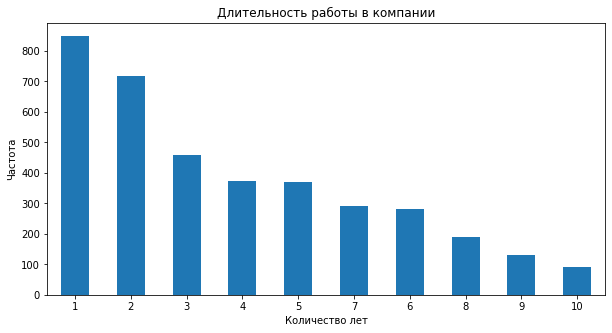

In [40]:
plt.figure(figsize=(10, 5))

train_job_sat['employment_years'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Длительность работы в компании')
plt.xlabel("Количество лет")
plt.ylabel("Частота")
plt.show();

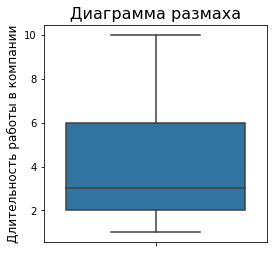

In [41]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_job_sat,y='employment_years');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Длительность работы в компании", fontsize=12);

Видно, что с ростом длительности работы в компании 1 до 10 лет происходит планомерное снижение количества сотрудников, т.е. основная часть людей работает в компании недавно. Так, половина сотрудников проработали в компании не более 3-х лет, а 75 % - не более 6 лет. 

Теперь изучим столбец с данными об оценке качества работы сотрудника, которую дал руководитель. Из основной информации можно сказать, что всего имеется 5 значений оценки (от 1 до 5). Посмотрим, в каких долях они распределены, построив столбчатую диаграмму и диаграмму размаха:

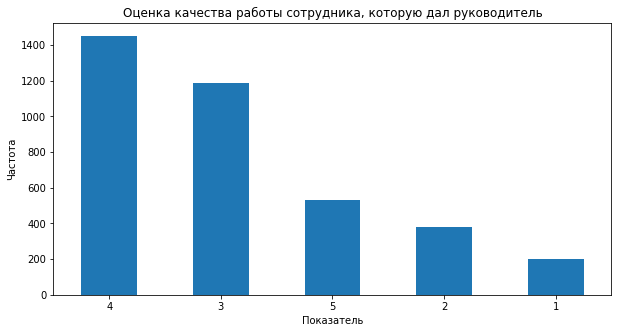

In [42]:
plt.figure(figsize=(10, 5))

train_job_sat['supervisor_evaluation'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Оценка качества работы сотрудника, которую дал руководитель')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

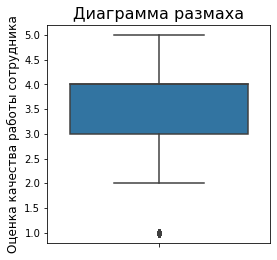

In [43]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_job_sat,y='supervisor_evaluation');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Оценка качества работы сотрудника", fontsize=12);

В среднем сотрудники имеют оценку качества своей работы на уровне почти 3.5, что логично, поскольку большинство получили отметку 3 и 4. При этом самая низкая оценка (1), которую получили всего около 200 сотрудников (т.е. примерно 2 % от общего числа), считается выбросом.

Далее рассмотрим как распределена ежемесячная заработная плата сотрудников:

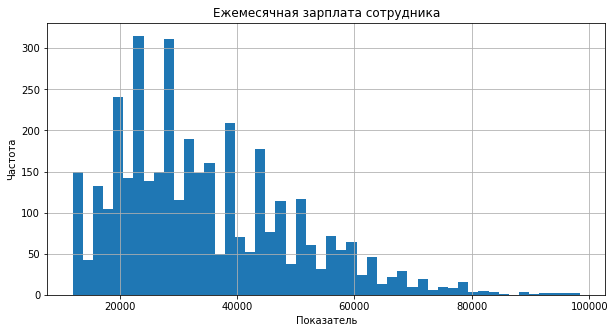

In [44]:
plt.figure(figsize=(10, 5))

train_job_sat['salary'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Ежемесячная зарплата сотрудника')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

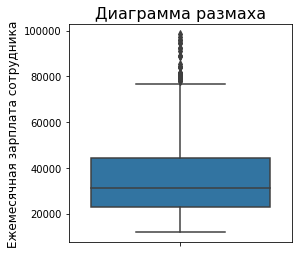

In [45]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_job_sat,y='salary');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Ежемесячная зарплата сотрудника", fontsize=12);

In [46]:
train_job_sat.query('salary >= 75000')['salary'].count()

59

В первом приближении данные имеют вид смещённого нормального распределения. Однако, поскольку среднее значение (около 34000) смещено в сторону нижней границы, т.е. 12000, то зарплаты на уровне примерно 75000 и выше считаются выбросами, их получают всего 59 из 3752 сотрудников.

Наконец, рассмотрим целевой признак в тренировочной выборке, а именно, уровень удовлетворённости сотрудника работой в компании:

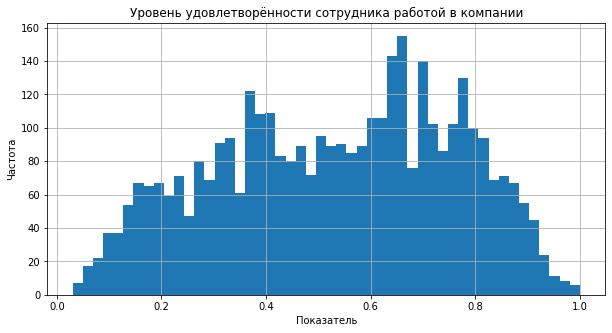

In [47]:
plt.figure(figsize=(10, 5))

train_job_sat['job_satisfaction_rate'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Уровень удовлетворённости сотрудника работой в компании')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

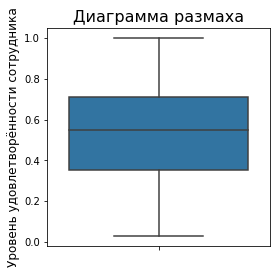

In [48]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_job_sat,y='job_satisfaction_rate');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Уровень удовлетворённости сотрудника", fontsize=12);

Данные здесь имеют в целом вид нормального распределения, однако самые распространённые оценки уровня удовлетворённости смещены несколько правее середины. При этом среднее и медианное значения довольно близки: 0.53 и 0.55, соответственно. То есть доля тех, кто более удовлетворён своей работой (> 0.5), лишь незначительно превышает долю тех, кто скорее не удовлетворён (< 0.5).

Перейдём к категориальным признаками тренировочной выборки. 

Сначала посмотрим, в каких отделах, работают сотрудники:

In [49]:
train_job_sat['dept'].describe()

count      3752
unique        5
top       sales
freq       1377
Name: dept, dtype: object

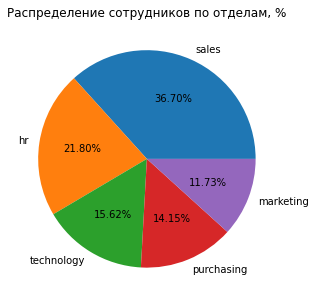

In [50]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=train_job_sat['dept'].value_counts(),
    labels=train_job_sat['dept'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение сотрудников по отделам, %')
plt.show();

Около 36.5 % сотрудников работают в отделе продаж, ещё почти 22 % - в HR, затем около 15.6 % - в технологическом отделе, примерно 14 % в отделе закупок и около 11.7 % - в маркетинговом отделе.

Далее рассмотрим информацию об уровне занимаемой должности:

In [51]:
train_job_sat['level'].describe()

count       3752
unique         3
top       junior
freq        1700
Name: level, dtype: object

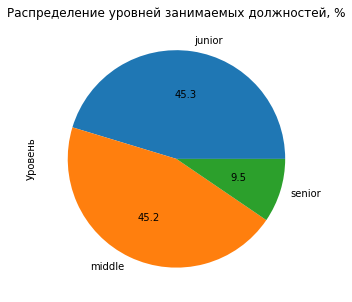

In [52]:
plt.figure(figsize=(9, 5))

train_job_sat['level'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней занимаемых должностей, %')
plt.show();

Почти равные доли сотрудников имеют начальный ("джун") и средний уровень работы: 45.3 % и 45.2 %, соответственно. Наконец, всего 9.5 % - опытные сотрудники/руководители/тимлиды.

Изучим степень загруженности сотрудников:

In [53]:
train_job_sat['workload'].describe()

count       3752
unique         3
top       medium
freq        1905
Name: workload, dtype: object

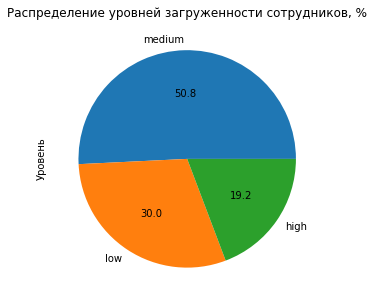

In [54]:
plt.figure(figsize=(9, 5))

train_job_sat['workload'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней загруженности сотрудников, %')
plt.show();

30 % сотрудников имеют низкий уровень загруженности, немногим более половины (50.8 %) - средний уровень, и около 19 % - сильно загружены работой. 

То есть несмотря на то, что малоопытных сотрудников в компании почти половина, часть из них уже загружены в средней степени.

Теперь посмотрим, какая доля сотрудников имела повышение за последний год:

In [55]:
train_job_sat['last_year_promo'].describe()

count     3752
unique       2
top         no
freq      3632
Name: last_year_promo, dtype: object

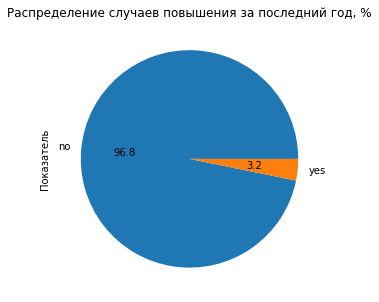

In [56]:
plt.figure(figsize=(9, 5))

train_job_sat['last_year_promo'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев повышения за последний год, %')
plt.show();

Только 3.2 % сотрудников получили повышение за последний год, что говорит о точечном поощрении сотрудников, которые наиболее качественно выполняют свою работу в компании.

Изучим информацию о том, нарушал ли сотрудник трудовой договор за последний год:

In [57]:
train_job_sat['last_year_violations'].describe()

count     3752
unique       2
top         no
freq      3199
Name: last_year_violations, dtype: object

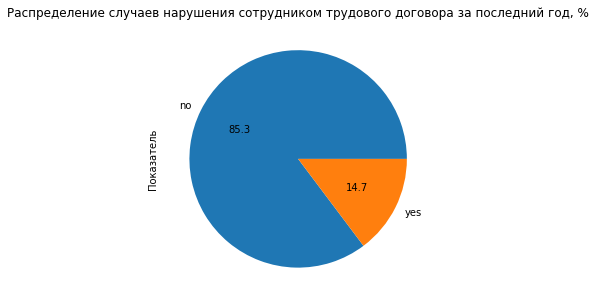

In [58]:
plt.figure(figsize=(9, 5))

train_job_sat['last_year_violations'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев нарушения сотрудником трудового договора за последний год, %')
plt.show();

14.7 % сотрудников нарушали пункты трудового договора за последний год, т.е. почти каждый 7 не с полной ответственностью подходил к исполнению своих трудовых обязанностей.

Наконец, для тренировочной выборки проведём небольшой корреляционный анализ признаков. Изучим взаимосвязь между признаками, построив матрицу корреляции с помощью метода Phik:

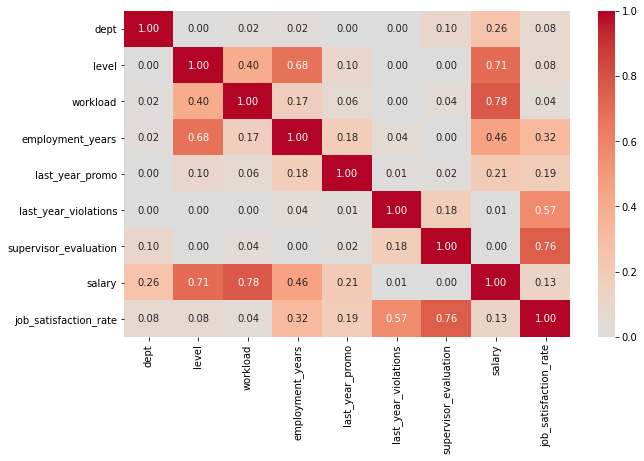

In [59]:
plt.figure(figsize=(10, 6));

sns.heatmap(
    train_job_sat.phik_matrix(
       interval_cols=['salary', 'job_satisfaction_rate']
   ),
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f'
);

Высокая корреляция целевого признака наблюдается со столбцом 'supervisor_evaluation', т.е. с оценкой руководителем качества выполняемой работы, а заметная - с 'last_year_violations', т.е. с нарушениями трудового договора за последний год. Остальные входные признаки слабо коррелируют с целевым.

Между некоторыми входными признаками также существует корреляция. Так, зарплата сотрудника в высокой степени коррелирует с уровнем занимаемой должности и степенью загруженности. Также высокая корреляция наблюдается между уровнем занимаемой должности и продолжительностью работы в компании.

При этом мультиколлинеарность отсутствует (коэффициент корреляции должен быть не менее 0.9).

Перейдём к анализу тестовой выборки:

In [60]:
test_job_sat.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


Как можно видеть, распределение количественных признаков имеет характер, аналогичный тренировочным данным. При этом, медианные значения полностью совпадают, а средние - незначительно отличаются от средних значений соответствуюших количественных признаков в тренировочной выборке.

Построим графики для каждого признака и подробнее изучим каждый из них.

Начнём со столбца 'employment_years': построим столбчатую диаграмму и диаграмму размаха:

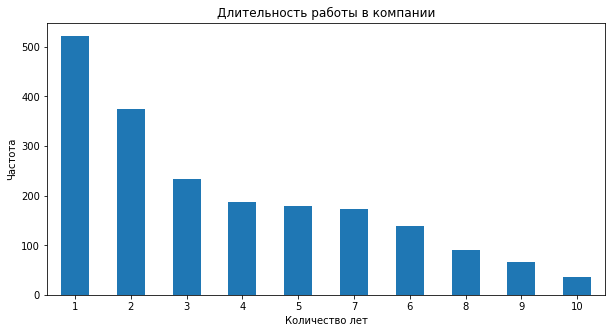

In [61]:
plt.figure(figsize=(10, 5))

test_job_sat['employment_years'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Длительность работы в компании')
plt.xlabel("Количество лет")
plt.ylabel("Частота")
plt.show();

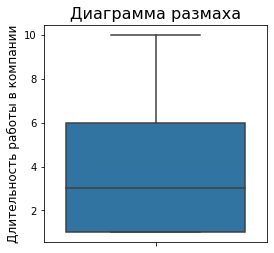

In [62]:
plt.figure(figsize=(4,4));

sns.boxplot(data=test_job_sat,y='employment_years');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Длительность работы в компании", fontsize=12);

Видно, что в отличие от тренировочной выборки, данные немного смещены к нижней границе, хотя по-прежнему половина сотрудников проработали в компании не более 3-х лет, а 75 % - не более 6 лет. 

Теперь изучим столбец с данными об оценке качества работы сотрудника, которую дал руководитель:

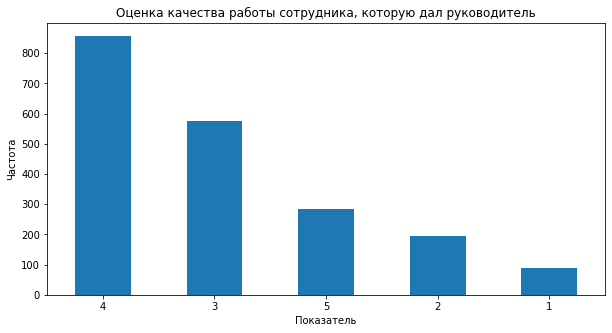

In [63]:
plt.figure(figsize=(10, 5))

test_job_sat['supervisor_evaluation'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Оценка качества работы сотрудника, которую дал руководитель')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

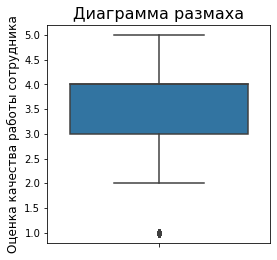

In [64]:
plt.figure(figsize=(4,4));

sns.boxplot(data=test_job_sat,y='supervisor_evaluation');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Оценка качества работы сотрудника", fontsize=12);

Здесь распределение в высокой степени повторяет тенденции оценок качества работы сотрудника на тренировочной выборке.

Наконец, посмотрим распределение ежемесячной зарплаты сотрудников:

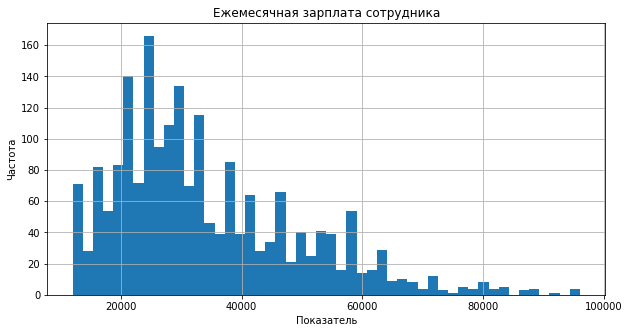

In [65]:
plt.figure(figsize=(10, 5))

test_job_sat['salary'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Ежемесячная зарплата сотрудника')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

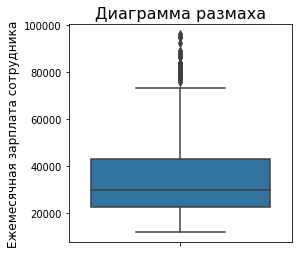

In [66]:
plt.figure(figsize=(4,4));

sns.boxplot(data=test_job_sat,y='salary');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Ежемесячная зарплата сотрудника", fontsize=12);

В первом приближении данные имеют аналогичные закономерности, что и в случае тренировочной выборки, среднее значение находится примерно на уровне 34000, а зарплаты на уровне примерно 75000 и выше считаются выбросами.

Наконец, рассмотрим целевой признак в тестовой выборке, а именно, уровень удовлетворённости сотрудника работой в компании:

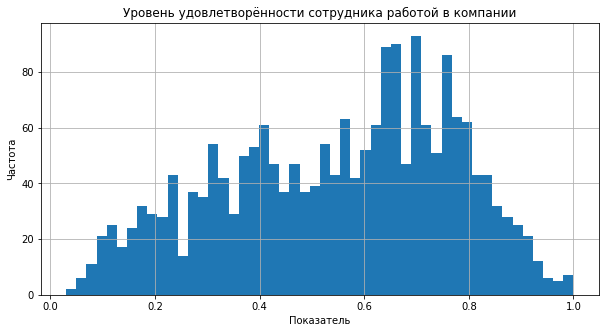

In [67]:
plt.figure(figsize=(10, 5))

test_job_sat['job_satisfaction_rate'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Уровень удовлетворённости сотрудника работой в компании')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

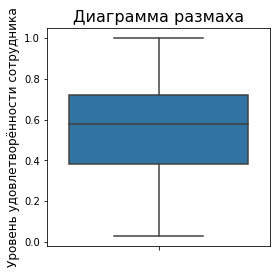

In [68]:
plt.figure(figsize=(4,4));

sns.boxplot(data=test_job_sat,y='job_satisfaction_rate');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Уровень удовлетворённости сотрудника", fontsize=12);

Несколько более высокие в среднем оценки уровня удовлетворённости отмечаются для тестовых данных, хотя в целом тенденции аналогичны тренировочным данным.

Перейдём к рассмотрению категориальных признаков:

In [69]:
test_job_sat['dept'].describe()

count      2000
unique        5
top       sales
freq        766
Name: dept, dtype: object

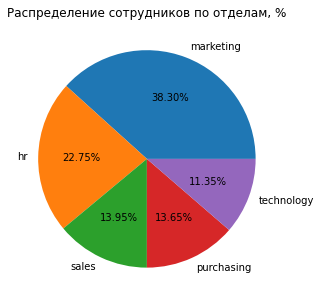

In [70]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=test_job_sat['dept'].value_counts(),
    labels=test_job_sat['dept'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение сотрудников по отделам, %')
plt.show();

Можем видеть, что здесь картина распредления сотрудников по отделам отличается. Так, около 38.5 % сотрудников работают в маркетинговом отделве, около 23 % -  в HR, затем почти 14 % - в отделе продаж, примерно 13.5 % - в отделе закупок и около 11.5 % - в технологическом отделе.

Далее рассмотрим информацию об уровне занимаемой должности:

In [71]:
test_job_sat['level'].describe()

count       2000
unique         3
top       junior
freq         975
Name: level, dtype: object

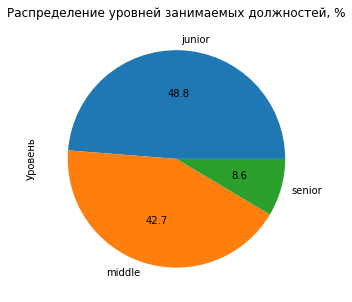

In [72]:
plt.figure(figsize=(9, 5))

test_job_sat['level'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней занимаемых должностей, %')
plt.show();

Около 49 % сотрудников имеют начальный уровень должности, почти 43 % - занимает средний класс сотрудников и примерно 8.5 % - опытные сотрудники/руководители/тимлиды.

Изучим степень загруженности сотрудников:

In [73]:
test_job_sat['workload'].describe()

count       2000
unique         3
top       medium
freq        1044
Name: workload, dtype: object

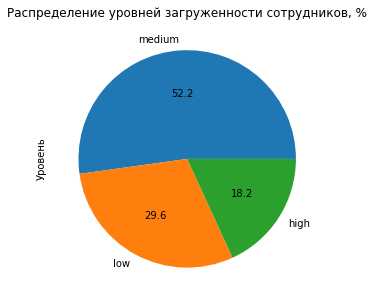

In [74]:
plt.figure(figsize=(9, 5))

test_job_sat['workload'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней загруженности сотрудников, %')
plt.show();

29.6 % сотрудников имеют низкий уровень загруженности, чуть более 52 % - средний уровень, и около 18 % - сильно загружены работой.

Теперь посмотрим, какая доля сотрудников имела повышение за последний год:

In [75]:
test_job_sat['last_year_promo'].describe()

count     2000
unique       2
top         no
freq      1937
Name: last_year_promo, dtype: object

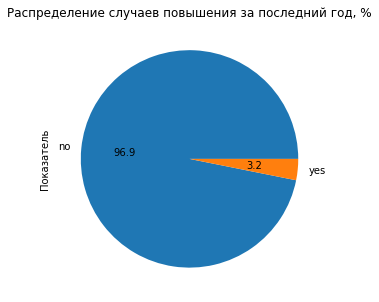

In [76]:
plt.figure(figsize=(9, 5))

test_job_sat['last_year_promo'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев повышения за последний год, %')
plt.show();

Тот же процент (3.2 %) сотрудников получили повышение за последний год.

Изучим информацию о том, нарушал ли сотрудник трудовой договор за последний год:

In [77]:
test_job_sat['last_year_violations'].describe()

count     2000
unique       2
top         no
freq      1738
Name: last_year_violations, dtype: object

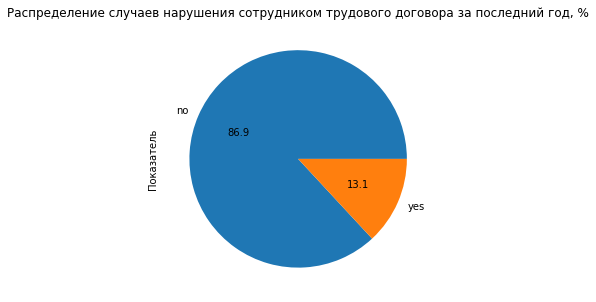

In [78]:
plt.figure(figsize=(9, 5))

test_job_sat['last_year_violations'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев нарушения сотрудником трудового договора за последний год, %')
plt.show();

В тестовой выборке более чем на 1.5 % меньше, т.е. 13.1 % сотрудников нарушали пункты трудового договора за последний год.

*Таким образом, был проведён исследовательский анализ данных, в результате которого было определено следующее:*
1. Для тренировочной выборки train_job_sat:
- большинство сотрудников проработали в компании 1-2 года, а в среднем - не более 3.5 лет;
- в среднем руководители дали оценку качества работы сотрудника на уровне примерно 3.5, т.е. большая часть получили 3 и 4 балла из 5;
- ежемесячная заработная плата сотрудника в среднем составляет около 34000
- средний уровень удовлетворённости сотрудника работой в компании несколько превышает 0.5, при изменении от 0.03 до 1.00;
- типичный сотрудник компании с большей вероятностью работает в отделе продаж, имеет начальный уровень должности и среднюю степень загруженности, за последний год не имел повышения и не нарушал трудовой договор.  
- employment_years — длительность работы в компании (в годах);

2. Для тестовых данных (датафрейм test_job_sat) в целом тенденции аналогичны тренировочной выборке, однако в данном случае типичный сотрудник компании работает в маркетинговом отделе.

Корреляционный анализ с использованием корреляции Phik показал, что мультиколлинеарность между входными признаками отсутствует (коэффициент корреляции должен быть не менее 0.9), однако на основании построенной тепловой карты можно с уверенностью сказать о высокой линейно зависимости уровнем удовлетворённости сотрудника работой и оценкой руководителем качества выполняемой работы. При этом между некоторыми входными признаками также существует высокая корреляция: зарплата сотрудника в высокой степени коррелирует с уровнем занимаемой должности и степенью загруженности, например.

Дальнейшую подготовку входных признаков следует провести следующим образом:
- количественные признаки ('employment_years', 'supervisor_evaluation' и 'salary') масштабировать с помощью StandardScaler(), MinMaxScaler(), RobustScaler();
- категориальные признаки 'level' и 'workload' кодировать с помощью OrdinalEncoder();
- категориальные признаки 'dept', 'last_year_promo' и 'last_year_violations' кодировать с помощью OneHotEncoder().

## Подготовка данных

Проведём подготовку данных.

Для подготовки данных создадим пайплайн data_preprocessor_sat с использованием ColumnTransformer. Количественные и категориальные данные обработаем в пайплайне раздельно.

Разделим тренировочную и тестовую выборки на входные и целевой признак:

In [79]:
X_train_sat = train_job_sat.drop(['job_satisfaction_rate'], axis=1)
y_train_sat = train_job_sat['job_satisfaction_rate']

X_test_sat = test_job_sat.drop(['job_satisfaction_rate'], axis=1)
y_test_sat = test_job_sat['job_satisfaction_rate']

Создадим списки для кодирования (OneHotEncoder и OrdinalEncoder) и масштабирования (StandardScaler):

In [80]:
train_job_sat.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [81]:
ohe_columns_sat = [
    'dept',    
    'last_year_promo',
    'last_year_violations'
]

ord_columns_sat = [
    'level',
    'workload'
]


num_columns_sat = [
    'employment_years',
    'supervisor_evaluation',
    'salary'
]

Добавляем OHE-кодирование в пайплайн:

In [82]:
ohe_pipe_sat = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values='unknown', strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        )
    ]
)


Добавляем ORD-кодирование в пайплайн:

In [83]:
ord_pipe_sat = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values='unknown', strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['medium', 'high', 'low'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)


Объединяем предыдущие этапы в пайплайн data_preprocessor:

In [84]:
data_preprocessor_sat = ColumnTransformer(
    [
        ('ohe', ohe_pipe_sat, ohe_columns_sat),
        ('ord', ord_pipe_sat, ord_columns_sat),
        ('num', StandardScaler(), num_columns_sat)
    ], 
    remainder='passthrough'
)

Данные подготовлены.

## Обучение моделей

Обучим как минимум две модели. Возьмём одну линейную модель (LinearRegression), а в качестве второй — дерево решений (DecisionTreeRegressor). Подберём гиперпараметры как минимум для одной модели с помощью одного из известных нам инструментов.

Выберем лучшую модель и проверим её качество. Выбор сделаем на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).

Сначала напишем функцию, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. 

In [85]:
def smape(y_true, y):
    y_true = np.array(y_true)
    numer = np.abs(y_true - y)
    denom = (np.abs(y_true) + np.abs(y)) / 2
    func = np.mean(numer / denom)
    return func * 100

In [86]:
smape_score = make_scorer(smape, greater_is_better=False)

Используем эту метрику при подборе гиперпараметров и оценке качества моделей. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

Создадим пайплайн pipe_final_sat для поиска лучшей модели. Масштабируем данные методами StandardScaler(), MinMaxScaler() и RobustScaler():

In [87]:
RANDOM_STATE = 77

pipe_final_sat = Pipeline([
    ('preprocessor', data_preprocessor_sat),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])
#чтобы задать перебор моделей, нужно напрямую обратиться к шагу models. 
#сделаем это и вставим список моделей:

param_grid_sat = [
     # словарь для модели LinearRegression()
    {
        'models': [LinearRegression(n_jobs=-1)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_split': range(2,20),
        'models__min_samples_leaf': range(2,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    }
]

rs_sat = RandomizedSearchCV(
    pipe_final_sat, 
    param_grid_sat,
    n_iter=500,
    cv=5,
    scoring=smape_score,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rs_sat.fit(X_train_sat, y_train_sat)

print('Лучшая модель и её параметры:\n\n', rs_sat.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации выборке:', -1 * round(rs_sat.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'las

In [88]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_sat_pred = rs_sat.predict(X_test_sat)

print(f'Метрика SMAPE на тестовой выборке: {round(smape(y_test_sat, y_test_sat_pred), 2)}')

Метрика SMAPE на тестовой выборке: 13.47


Сделаем проверку лучшей модели на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу. В качестве константной модели используем 'DummyRegressor':

In [89]:
# создание и обучение модели DummyRegressorRegressor 
dummy_reg = DummyRegressor(strategy='mean')

dummy_reg.fit(X_train_sat, y_train_sat)

# предсказание на тестовых данных
dummy_reg_preds = dummy_reg.predict(X_test_sat)

# оценка качества модели по метрике SMAPE

print(f'Метрика SMAPE на тестовой выборке: {round(smape(y_test_sat, dummy_reg_preds), 2)}')

Метрика SMAPE на тестовой выборке: 38.26


Как можно видеть, сравнительная константная модель показала гораздо худшие результаты в предсказании уровня удовлетворённости сотрудников работой: метрика SMAPE на тестовой выборке составила 38.26, против нашей наилучшей модели с метрикой 13.47.

В решении сохраним работу со всеми моделями, которые мы пробовали. Для этого командой rs_sat.cv_results_ получим все результаты и сделаем из них датафрейм. Выведем четыре столбца, отсортируем по rank_test_score — рейтингу качества моделей:

In [90]:
result = pd.DataFrame(rs_sat.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

,rank_test_score,param_models,mean_test_score,params
473,1,DecisionTreeRegressor(random_state=77),-15.230863,"{'preprocessor__num': 'passthrough', 'models__..."
133,2,DecisionTreeRegressor(random_state=77),-15.324957,"{'preprocessor__num': 'passthrough', 'models__..."
398,3,DecisionTreeRegressor(random_state=77),-15.387951,"{'preprocessor__num': 'passthrough', 'models__..."
58,4,DecisionTreeRegressor(random_state=77),-15.388088,"{'preprocessor__num': MinMaxScaler(), 'models_..."
196,5,DecisionTreeRegressor(random_state=77),-15.420705,"{'preprocessor__num': MinMaxScaler(), 'models_..."
...,...,...,...,...
343,495,DecisionTreeRegressor(random_state=77),-34.200948,"{'preprocessor__num': StandardScaler(), 'model..."
388,497,DecisionTreeRegressor(random_state=77),-34.255386,"{'preprocessor__num': RobustScaler(), 'models_..."
335,498,DecisionTreeRegressor(random_state=77),-34.257079,"{'preprocessor__num': 'passthrough', 'models__..."
118,499,DecisionTreeRegressor(random_state=77),-34.959415,"{'preprocessor__num': MinMaxScaler(), 'models_..."


Итак, на основании использования пайпланов наилучшие значения метрики SMAPE на кросс-валидации (15.23) и на тестовой выборке (13.47) были получены для модели DecisionTreeRegressor(max_depth=19, max_features=10, min_samples_leaf=4, min_samples_split=4, random_state=77).

## Оформление выводов

В первой части проекта необходимо было предсказать уровень удовлетворённости сотрудника.

1. Общая информация о данных:

В этой задаче было представлено три таблицы с данными: тренировочная выборка, тестовая выборка с входными признаками и тестовая выборка с целевым признаком. 

Тренировочная выборка содержала по 4000 строк и 8 столбцов с входными признаками, а также отдельный столбец с целевым признаком 'job_satisfaction_rate'

2. Предобработка данных:

В результате предобработки данных:
- пропущенные значения в категориальных признаках датафреймов, при их наличии, были обработаны с помощью пайплайна с инструментом SimpleImputer: NaN и пустые строки заменили на моду ('most_frequent');
- явные дубликаты были удалены: 248 - в тренировочной выборке и 83 - в тестовой выборке, а неявные - отсутствовали;
- названия столбцов написаны по правилам синтаксиса;
- типы данных соответствуют содержимому столбцов. 


3. Исследовательский анализ:

На основании исследовательского анализа тренировочной выборки можно сказать, что среднестатистический сотрудник:
- работает в компании около 3.5 лет;
- имеет оценку качества своей работы на уровне 3.5 из 5;
- получает около 34000 ежемесячно;
- скорее удовлетворён своей работой;
- с большей вероятностью работает в отделе продаж;
- имеет начальный уровень должности и среднюю степень загруженности;
- за последний год не имел повышения и не нарушал трудовой договор.

Корреляционный анализ с использованием корреляции Phik показал, что мультиколлинеарность между входными признаками отсутствует (коэффициент корреляции должен быть не менее 0.9).


4. Подготовка данных:

Обучение и поиск лучшей модели осуществлялись при помощи пайплайнов, которые позволяют автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.

Подготовку входных признаков проводили в пайплайне data_preprocessor_sat с помощью инструмента ColumnTransformer следующим образом:
- для масштабирования количественных признаков применяли StandardScaler(), MinMaxScaler(), RobustScaler();
- для кодирования категориальных признаков использовали OneHotEncoder() и OrdinalEncoder().

5. Обучение моделей:

Далее были созданы итоговые пайплайны, которые включали пайплайны подготовки данных и перебирали разные модели. 

Поскольку предсказание уровня удовлетворённости сотрудников работой представляет собой задачу регресии, применялись две модели: линейная (LinearRegression) и дерево решений (DecisionTreeRegressor). Для последней были подобраны гиперпараметры с помощью RandomizedSearchCV. Данные масштабировались методами StandardScaler(), MinMaxScaler() и RobustScaler(). 

Здесь выбор и проверка качества лучшей модели основывался на показаниях новой метрики SMAPE («симметричное среднее абсолютное процентное отклонение»), котороая должна была принимать значения по модулю менее 15 для тестовой выборки, чтобы модель можно было считать качественной.

Таким образом, с задачей предсказания уровня удовлетворённости сотрудника лучше справилась модель дерева решений (DecisionTreeRegressor), которая позволяет настраивать различные гиперпараметры для поиска наиболее оптимальной конфигурации, необходимой для получения высоких показателей метрики SMAPE.

Модель дерева решений хорошо справляется с данными, в которых категориальных признаков больше, чем количественных. В нашей задаче из 8 входных признаков 5 являются категориальными.

# Задача 2: предсказание увольнения сотрудника из компании

## Загрузка данных

Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:
- /datasets/train_quit.csv - train_quit;
- /datasets/test_features.csv - test_features (входные признаки тестовой выборки те же, что и в прошлой задаче);
- /datasets/test_target_quit.csv - test_target_quit.

Поменяем базовые индексы в датафрейме — сделаем индексами идентификаторы клиентов:

In [91]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
train_quit = train_quit.set_index('id')

test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
test_target_quit = test_target_quit.set_index('id')

Проверим, что данные в таблицах соответствуют описанию. Выведем по одной случайной строке всех датафреймов:

In [92]:
train_quit.sample(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
852119,marketing,middle,low,7,no,no,4,31200,no


In [93]:
test_target_quit.sample(1)

,quit
id,
187954,yes


Аналогичным образом объединим test_job_sat (удалив столбец 'job_satisfaction_rate' с помощью drop()), который уже прошёл предобработку в первой задаче, и test_target_quit в test_quit методом merge, используя индексы ('id'):

In [94]:
test_quit = test_job_sat.drop(['job_satisfaction_rate'], axis=1).merge(test_target_quit, on='id')

test_quit.sample()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
893206,hr,junior,medium,1,no,no,5,22800,no


Таким образом, представленные исходные данные соответствуют описанию.

## Предобработка данных

Проведём предобработку данных.

Рассмотрим общую информацию о каждом датафрейме:

In [95]:
data_main_info(train_quit)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB
None

Первые пять строк таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


В тренировочной выборке 4000 строк и 9 столбцов, а все типы данных соответствуют содержимому. Названия столбцов написаны по правилам синтаксиса.

Проверим данные на наличие пропусков и дубликатов:

In [96]:
data_preprocessing(train_quit)

Количество пропущенных значений в каждом столбце:
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Количество явных дубликатов: 1413


В датафрейме 1413 строк-дубликатов, что свидетельствует о повторении данных у разных пользователей. Пропущенные значения отсутствуют. 

Удалим явные дубликаты:

In [97]:
train_quit = train_quit.drop_duplicates()

train_quit.duplicated().sum()

0

Далее посмотрим на уникальные значения категориальных признаков на предмет неявных дубликатов:

In [98]:
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [99]:
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

Исправим ошибку: заменим 'sinior' на 'senior':

In [100]:
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')

train_quit['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

In [101]:
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [102]:
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [103]:
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [104]:
train_quit['quit'].unique()

array(['no', 'yes'], dtype=object)

Неявные дубликаты в датафрейме train_quit отсутствуют.

Наконец, рассмотрим таблицу с целевым признаком тестовых данных test_quit:

In [105]:
data_main_info(test_quit)

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2000 non-null   object
 1   level                  2000 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 156.2+ KB
None

Первые пять строк таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


Здесь 2000 строк и 1 столбец с целевым признаком. Тип данных соответствует содержимому. Название столбца написано по правилам синтаксиса.

Проверим данные на наличие пропусков и дубликатов:

In [106]:
data_preprocessing(test_quit)

Количество пропущенных значений в каждом столбце:
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Количество явных дубликатов: 507


Пропущенные значения отсутствуют, имеется 507 строк-дубликатов. Как и в первой задаче, оставим их.

Проверим наличие неявных дубликатов в столбце 'quit': этом: 

In [107]:
test_quit['quit'].unique()

array(['no', 'yes'], dtype=object)

Неявных дубликатов нет.

*Таким образом, в результате предобработки данных:* 
- пропущенные значения в категориальных признаках датафреймов отсутствуют;
- явные дубликаты были удалены, а неявные - отсутствовали;
- названия столбцов написаны по правилам синтаксиса;
- типы данных соответствуют содержимому столбцов. 

## Исследовательский анализ данных

Проведём исследовательский анализ с новым целевыи признаком у тренировочных данных  и тестовых данных. Входные признаки тестовых данных были исследованы в предыдущей задаче.

Начнём с изучения статистики количественных признаков в тренировочной выборке train_quit. Вызовем метод describe:

In [108]:
train_quit.describe()

,employment_years,supervisor_evaluation,salary
count,2587.000000,2587.000000,2587.000000
mean,4.213375,3.367994,37107.692308
std,2.601105,1.080243,16267.354906
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,24000.000000
50%,4.000000,3.000000,33600.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


Как можно видеть, распределение количественных признаков имеет характер, аналогичный данным в первой задаче. медианные значения полностью совпадают, а средние - незначительно отличаются от средних значений соответствуюших количественных признаков в первой задаче.

Построим графики для каждого признака и подробнее изучим каждый из них.

Начнём со столбца 'employment_years': построим столбчатую диаграмму и диаграмму размаха:

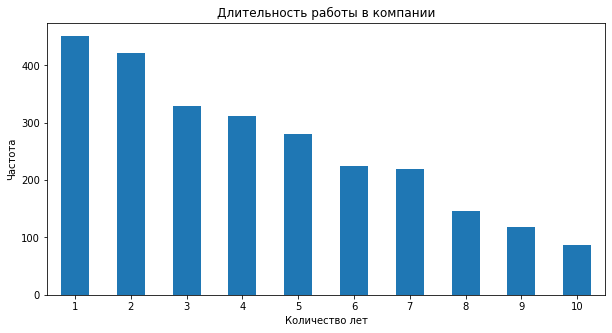

In [109]:
plt.figure(figsize=(10, 5))

train_quit['employment_years'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Длительность работы в компании')
plt.xlabel("Количество лет")
plt.ylabel("Частота")
plt.show();

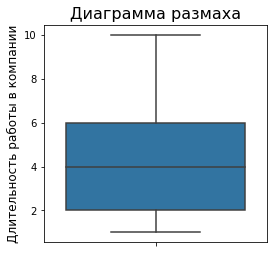

In [110]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_quit,y='employment_years');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Длительность работы в компании", fontsize=12);

Видно, что основная часть людей работает в компании недавно, при этом половина сотрудников проработали в компании не более 4-х лет, а 75 % - не более 6 лет. Это несколько отличается от данных в первой задаче.

Теперь изучим столбец с данными об оценке качества работы сотрудника, которую дал руководитель:

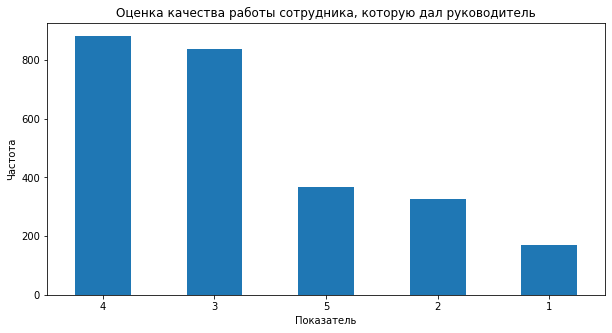

In [111]:
plt.figure(figsize=(10, 5))

train_quit['supervisor_evaluation'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Оценка качества работы сотрудника, которую дал руководитель')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

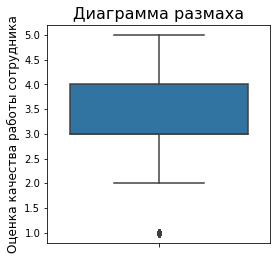

In [112]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_quit,y='supervisor_evaluation');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Оценка качества работы сотрудника", fontsize=12);

В среднем сотрудники имеют оценку качества своей работы также на уровне почти 3.4, а самая низкая оценка (1) по-прежнему считается выбросом.

Далее рассмотрим как распределена ежемесячная заработная плата сотрудников:

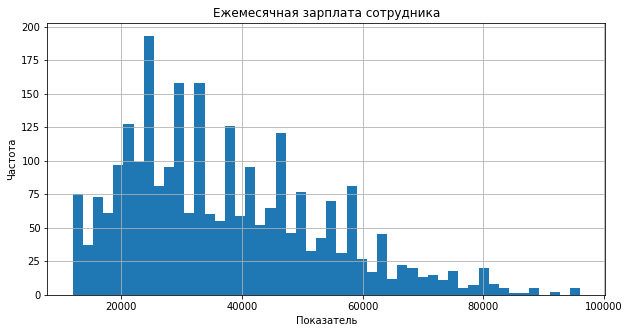

In [113]:
plt.figure(figsize=(10, 5))

train_quit['salary'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Ежемесячная зарплата сотрудника')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

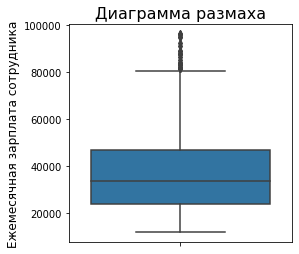

In [114]:
plt.figure(figsize=(4,4));

sns.boxplot(data=train_quit,y='salary');

plt.title("Диаграмма размаха", fontsize=16);
plt.ylabel("Ежемесячная зарплата сотрудника", fontsize=12);

Среднее значение ежемесячной заработной платы здесь несколько выше, чем в предыдущей задаче: примерно 37000 против 34000. Оно также смещено в сторону нижней границы, а зарплаты на уровне примерно 80000 и выше считаются выбросами.

Перейдём к категориальным признаками тренировочной выборки. 

Сначала посмотрим, в каких отделах, работают сотрудники:

In [115]:
train_quit['dept'].describe()

count      2587
unique        5
top       sales
freq        805
Name: dept, dtype: object

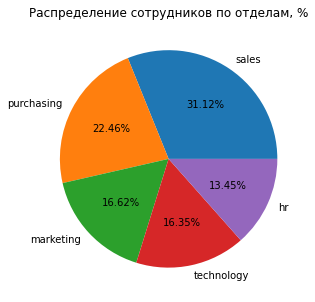

In [116]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=train_quit['dept'].value_counts(),
    labels=train_quit['dept'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение сотрудников по отделам, %')
plt.show();

Около 31 % сотрудников работают в отделе продаж, ещё почти 22.5 % - в отделе закупок, затем 16.6 % - в маркетинговом отделе, почти 16.5 % в технологическом отделе и 13.5 % - в отделе HR. Такое распределение сотрудников по отделам серьёзно отличается от аналогичного распределения в первой задаче.

Далее рассмотрим информацию об уровне занимаемой должности:

In [117]:
train_quit['level'].describe()

count       2587
unique         3
top       middle
freq        1282
Name: level, dtype: object

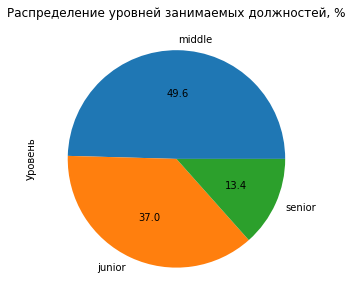

In [118]:
plt.figure(figsize=(9, 5))

train_quit['level'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней занимаемых должностей, %')
plt.show();

Почти половина (49.6 %) сотрудников имеют начальный уровень должности, 37 % занимает средний класс сотрудников, и всего около 13.5 % - опытные сотрудники/руководители/тимлиды.

Изучим степень загруженности сотрудников:

In [119]:
train_quit['workload'].describe()

count       2587
unique         3
top       medium
freq        1244
Name: workload, dtype: object

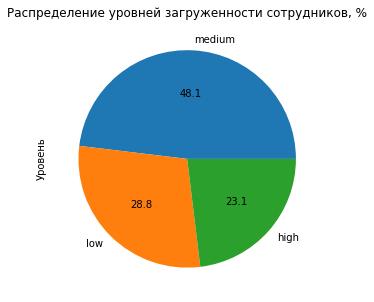

In [120]:
plt.figure(figsize=(9, 5))

train_quit['workload'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней загруженности сотрудников, %')
plt.show();

Почти 29 % сотрудников имеют низкий уровень загруженности, около половины (48.1 %) - средний уровень, и около 23 % - сильно загружены работой.

Теперь посмотрим, какая доля сотрудников имела повышение за последний год:

In [121]:
train_quit['last_year_promo'].describe()

count     2587
unique       2
top         no
freq      2476
Name: last_year_promo, dtype: object

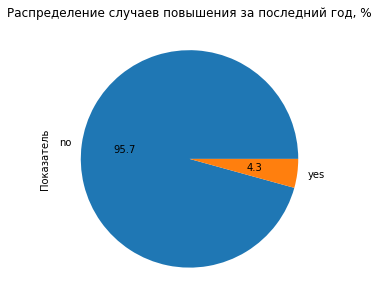

In [122]:
plt.figure(figsize=(9, 5))

train_quit['last_year_promo'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев повышения за последний год, %')
plt.show();

Всего 4.3 % сотрудников получили повышение за последний год.

Изучим информацию о том, нарушал ли сотрудник трудовой договор за последний год:

In [123]:
train_quit['last_year_violations'].describe()

count     2587
unique       2
top         no
freq      2111
Name: last_year_violations, dtype: object

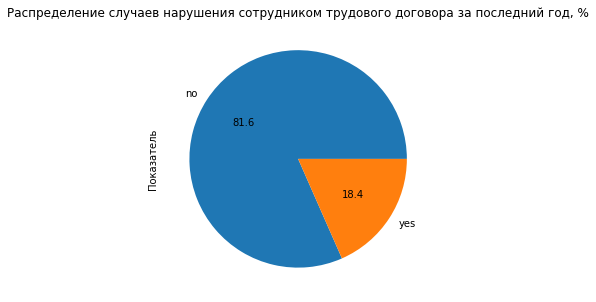

In [124]:
plt.figure(figsize=(9, 5))

train_quit['last_year_violations'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев нарушения сотрудником трудового договора за последний год, %')
plt.show();

Примерно 18.5 % сотрудников нарушали пункты трудового договора за последний год.

Наконец, рассмотрим целевой признак в тренировочной выборке, а именно, показатель, уволился ли сотрудник из компании:

In [125]:
train_quit['quit'].describe()

count     2587
unique       2
top         no
freq      1932
Name: quit, dtype: object

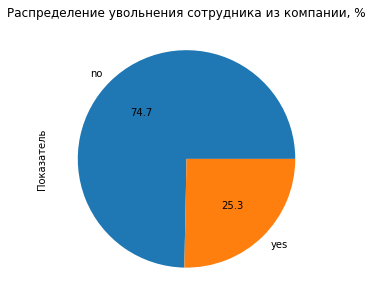

In [126]:
plt.figure(figsize=(9, 5))

train_quit['quit'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение увольнения сотрудника из компании, %')
plt.show();

Около четверти всех сотрудников (25.3 %) сотрудников уволились, т.е. почти каждый 4 сотрудник компании по тем или иным причинам расторгнул трудовой договор с компанией.

Далее для тренировочной выборки проведём небольшой корреляционный анализ признаков. Изучим взаимосвязь между признаками, построив матрицу корреляции с помощью метода Phik для всех данных и для каждой подгруппы целевого признака:

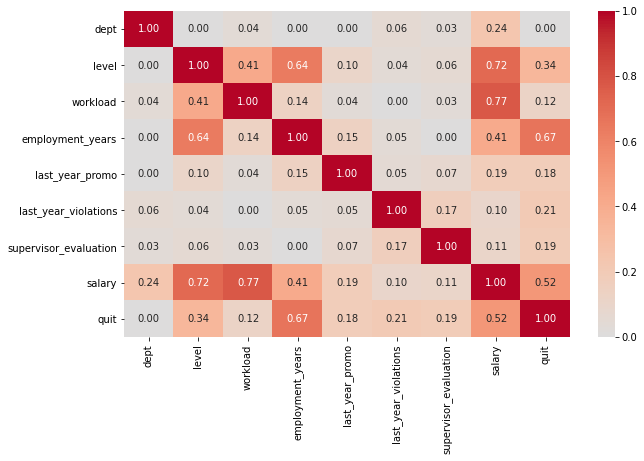

In [127]:
plt.figure(figsize=(10, 6));

sns.heatmap(
    train_quit.phik_matrix(
       interval_cols=['salary']
   ),
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f'
);

Заметная корреляция целевого признака 'quit' наблюдается со столбцом 'employment_years' и 'salary'. Остальные входные признаки слабо коррелируют с целевым. Между некоторыми входными признаками также существует корреляция, что подробнее рассмотрено в первой задаче.

При этом мультиколлинеарность для всех расммотренных слуваев отсутствует (коэффициент корреляции должен быть не менее 0.9).

Анализ входных признаков тестовой выборки был проведён в первой задаче. Осталось рассмотреть целевой признак тестовой выборки:

In [128]:
test_quit['quit'].describe()

count     2000
unique       2
top         no
freq      1436
Name: quit, dtype: object

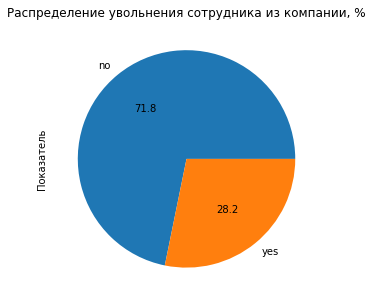

In [129]:
plt.figure(figsize=(9, 5))

test_quit['quit'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение увольнения сотрудника из компании, %')
plt.show();

Как можно видеть, по сравнению с тренировочными данными в тестовой выборке из компании уволилось около более 28 % сотрудников.

*Таким образом, был проведён исследовательский анализ данных, в результате которого было определено следующее:*
1. Для тренировочной выборки train_quit в целом тенденции по входным признакам аналогичны первой задаче, существенные отличия наблюдаются лишь для распределения сотрудников по отделам;

2. Для тренировочной и тестовой выборок целевой признак сохраняет приблизительно одинаковые пропорции оставшихся и уволившихся сотрудников: примерно 3 к 1, соответственно.

Корреляционный анализ с использованием корреляции Phik показал, что мультиколлинеарность между входными признаками также отсутствует (коэффициент корреляции должен быть не менее 0.9).

Составим портрет «уволившегося сотрудника» на основе тренировочный выборки:

In [130]:
train_quit.query('quit == "yes"').describe()

,employment_years,supervisor_evaluation,salary
count,655.000000,655.000000,655.000000
mean,2.161832,2.958779,25767.938931
std,1.497626,1.047705,10484.828614
min,1.000000,1.000000,12000.000000
25%,1.000000,2.000000,18000.000000
50%,2.000000,3.000000,24000.000000
75%,3.000000,4.000000,30600.000000
max,10.000000,5.000000,79200.000000


Как можно видеть, по количественным показателям уволившиеся сотрудники выделяются из общей массы.

Изучим каждый признак в отдельности:

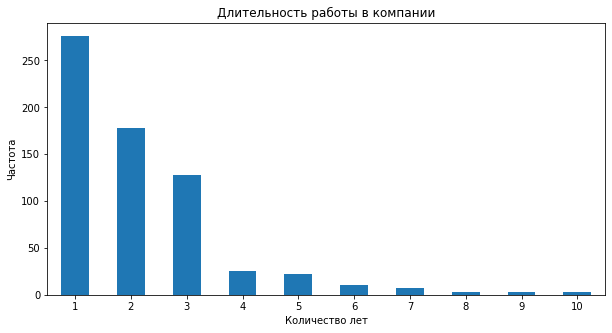

In [131]:
plt.figure(figsize=(10, 5))

train_quit.query('quit == "yes"')['employment_years'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Длительность работы в компании')
plt.xlabel("Количество лет")
plt.ylabel("Частота")
plt.show();

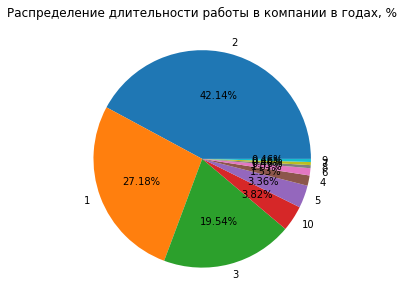

In [132]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=train_quit.query('quit == "yes"')['employment_years'].value_counts(),
    labels=train_quit.query('quit == "yes"')['employment_years'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение длительности работы в компании в годах, %')
plt.show();

В среднем уволившиеся сотрудники проработали в компании около 2 лет, тем не менее для каждого значения продолжительности работы в компании есть сотрудники, кто уволился. Причём около 90 % уволившихся сотрудников проработали в компании не более 3 лет.

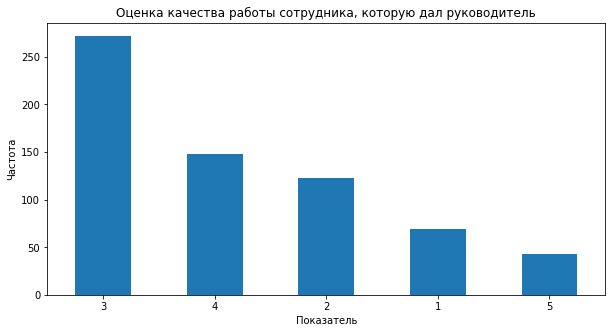

In [133]:
plt.figure(figsize=(10, 5))

train_quit.query('quit == "yes"')['supervisor_evaluation'].value_counts().plot(
    kind='bar',
    rot=0
);
plt.title('Оценка качества работы сотрудника, которую дал руководитель')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

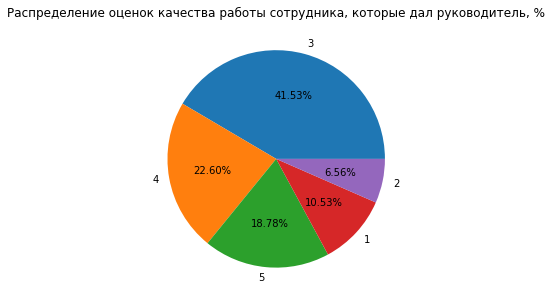

In [134]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=train_quit.query('quit == "yes"')['supervisor_evaluation'].value_counts(),
    labels=train_quit.query('quit == "yes"')['supervisor_evaluation'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение оценок качества работы сотрудника, которые дал руководитель, %')
plt.show();

Средние и медианные оценки качества работы уволившегося сотрудника находятся на уровне 3, однако так же, как и с длительностью работы, сотрудники увольнялись при любой оценке. При этом около 40 % уволившихся сотрудников имели оценки не ниже 4.

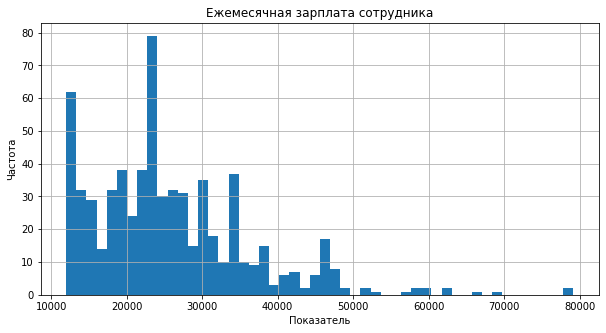

In [135]:
plt.figure(figsize=(10, 5))

train_quit.query('quit == "yes"')['salary'].hist(
    bins=50,
    grid = True,
    linewidth=3,
)
plt.title('Ежемесячная зарплата сотрудника')
plt.xlabel("Показатель")
plt.ylabel("Частота")
plt.show();

Большинство уволившихся сотрудников получали довольно низкую ежемесячную заработную плату: 12000 и примерно 24000. В то же время даже некоторые сотрудники с высокой зарплатой (около 80000) перестали работать в компании.

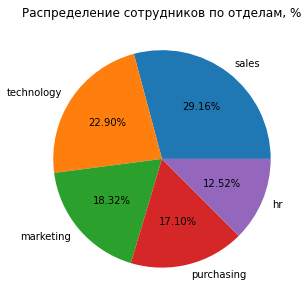

In [136]:
plt.figure(figsize=(9, 5))

plt.pie(
    x=train_quit.query('quit == "yes"')['dept'].value_counts(),
    labels=train_quit.query('quit == "yes"')['dept'].unique(),
    autopct='%1.2f%%',
);

plt.title('Распределение сотрудников по отделам, %')
plt.show();

Примерно 29 % уволившихся сотрудников работали в отделе продаж, ещё почти 23.5 % - в технологическом отделе, примерно 18.5 % - в маркетинговом отделе, 17.1 % - в отделе закупок, а около 12.5 % - в HR.

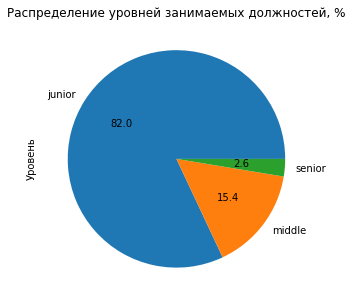

In [137]:
plt.figure(figsize=(9, 5))

train_quit.query('quit == "yes"')['level'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней занимаемых должностей, %')
plt.show();

Подавляющее большинство уволившихся сотрудников, 82 %, были на должности "джунов". Тогда как около 15.5 % уволившихся - среднее звено работников и всего 2.6 % - опытные сотрудники.

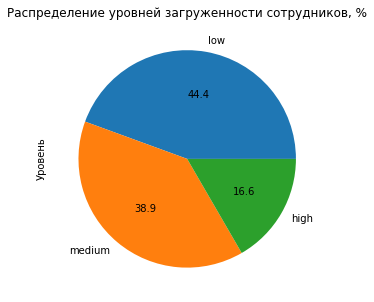

In [138]:
plt.figure(figsize=(9, 5))

train_quit.query('quit == "yes"')['workload'].value_counts().plot(
    kind='pie',
    ylabel='Уровень',
    autopct="%.1f",
);
plt.title('Распределение уровней загруженности сотрудников, %')
plt.show();

44.4 % уволившихся сотрудников были загружены работой в низкой степени, почти 39 % - в средней степени. И только 16.6 % тех, кто решил уйти из компании, имели высокую загруженность.

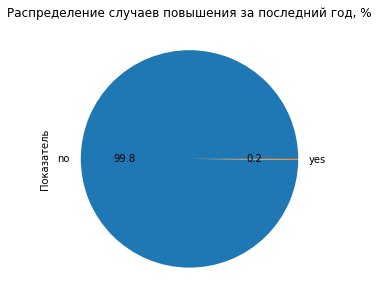

In [139]:
plt.figure(figsize=(9, 5))

train_quit.query('quit == "yes"')['last_year_promo'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев повышения за последний год, %')
plt.show();

99.8 % уволившихся сотрудников не имели повышение за последний год.

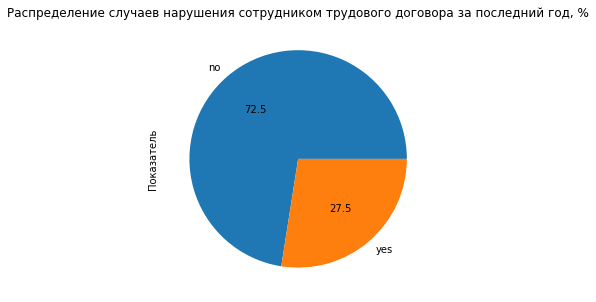

In [140]:
plt.figure(figsize=(9, 5))

train_quit.query('quit == "yes"')['last_year_violations'].value_counts().plot(
    kind='pie',
    ylabel='Показатель',
    autopct="%.1f",
);
plt.title('Распределение случаев нарушения сотрудником трудового договора за последний год, %')
plt.show();

27.5 % уволившихся сотрудников нарушали условия трудового договора за последний год.

***Таким образом, вырисовывается портрет «уволившегося сотрудника»:***
- средняя продолжительность работы в компании ниже аналогичных показателей для всех сотрудникам: около 2 лет против 4.2;
- средние оценки руководителем качества работы также ниже: 3 против 3.5;
- уровень ежемесячной заработной платы в среднем примерно на 11000 меньше, чем для всех сотрудников: 26000 против 37000;
- более 50 % работали в отделе продаж или в технологическом отделе;
- почти 90 % занимали начальный уровень должности;
- около половины имели низкую загруженность;
- почти никто не получал повышение за последний год;
- каждый четвёртый совершал нарушение своих трудовых обязанностей.

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки.

Для этого объединим две исходные тестовые выборки в test_target с помощью метода merge, учитывая одинаковые индексы в обеих выборках ('id'):

In [141]:
test_target = test_target_job_sat.merge(test_target_quit, on='id')

test_target.head()

,job_satisfaction_rate,quit
id,,
130604,0.74,no
825977,0.75,no
418490,0.60,yes
555320,0.72,no
826430,0.08,yes


Построим теперь на одном графике нормированные гистограммы распределения уровня удовлетворённости работой для оставшихся и уволившихся сотрудников, предварительно вызвав метод describe():

In [142]:
test_target.query('quit == "no"')['job_satisfaction_rate'].describe()

count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

In [143]:
test_target.query('quit == "yes"')['job_satisfaction_rate'].describe()

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

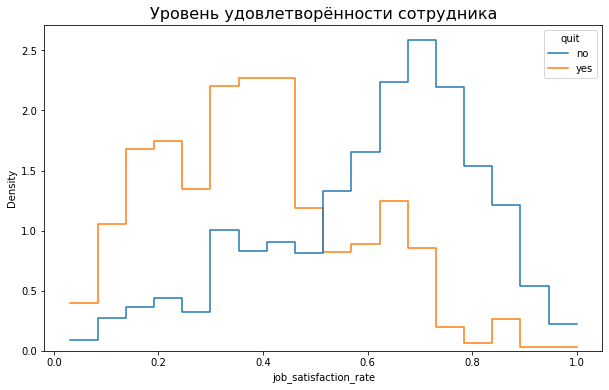

In [144]:
plt.figure(figsize=(10,6));

sns.histplot(
    data=test_target,
    x='job_satisfaction_rate',
    stat='density',
    common_norm=False,
    hue='quit',
    element='step',
    fill=False
)

plt.title("Уровень удовлетворённости сотрудника", fontsize=16);

Как можно видеть, в среднем уволившиеся сотрудники примерно в 1.5 раза менее удовлетворены своей работой: 0.39 против 0.61. При этом несмотря на то, что даже с высоким уровнем удовлетворённости сотрудники увольнялись, 75 % уволившихся были удовлетворены работой менее, чем на половину (< 0.5), что диаметрально противоположно показателям оставшихся сотрудников.

Дополнительно проведём статистический анализ. Проверим гипотезу о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Используем t-тест.

В качестве нулевой гипотезы примем, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

Тогда альтернативная гипотеза - уровень удовлетворённости сотрудника работой в компании не влияет на вероятность увольнения сотрудника из компании.

Уровень статистической значимости зададим равным 5 %.

Теперь проведём проверку:

In [145]:
alpha = 0.05 # уровень статистической значимости

quit_yes = test_target.query('quit == "yes"')['job_satisfaction_rate']

quit_no = test_target.query('quit == "no"')['job_satisfaction_rate']

results = st.ttest_ind(quit_yes, quit_no, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.0
Нет оснований отвергнуть нулевую гипотезу


То есть можно сказать, что уровень удовлетворённости сотрудника работой в компании действительно влияет на вероятность увольнения сотрудника из компании.

## Добавление нового входного признака

Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

Сначала разделим тренировочную и тестовую выборки по входным и целевому признакам:

In [146]:
X_train_quit = train_quit.drop(['quit'], axis=1)
y_train_quit = train_quit['quit']

X_test_quit = test_quit.drop(['quit'], axis=1)
y_test_quit = test_quit['quit']

Добавим новый признак к входным признакам тренировочной и тестовой выборок:

In [147]:
X_train_quit['job_satisfaction_rate'] = rs_sat.predict(X_train_quit)

X_train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.605000
814010,sales,junior,medium,2,no,no,4,27600,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,0.332500
257132,sales,junior,medium,2,no,yes,3,24000,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,0.791667


In [148]:
X_test_quit['job_satisfaction_rate'] = rs_sat.predict(X_test_quit)

X_test_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.845714
686555,hr,junior,medium,1,no,no,4,30000,0.682222
467458,sales,middle,low,5,no,no,4,19200,0.697778
418655,sales,middle,low,6,no,no,4,19200,0.697778
789145,hr,middle,medium,5,no,no,5,40800,0.812500


Как можно видеть, новый признак успешно добавился к обеим выборкам.

## Подготовка данных

Подготовим признаки так же, как и в первой задаче: для подготовки данных создадим пайплайн data_preprocessor_quit с использованием ColumnTransformer. Количественные и категориальные данные обработаем в пайплайне раздельно.

Сначала переведём целевой признак в 0 и 1, где 0 - покупательская активность осталась на прежнем уровне, а 1 - покупательская активность сизилась.

In [149]:
label_encoder = LabelEncoder()
y_train_quit = label_encoder.fit_transform(y_train_quit)
y_test_quit = label_encoder.transform(y_test_quit)

In [150]:
y_train_quit

array([0, 0, 0, ..., 1, 1, 0])

In [151]:
y_test_quit

array([0, 0, 0, ..., 1, 0, 0])

In [152]:
X_train_quit.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [153]:
ohe_columns_quit = [
    'dept',    
    'last_year_promo',
    'last_year_violations'
]

ord_columns_quit = [
    'level',
    'workload'
]


num_columns_quit = [
    'employment_years',
    'supervisor_evaluation',
    'salary',
    'job_satisfaction_rate'
]

In [154]:
ohe_pipe_quit = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        )
    ]
)


In [155]:
ord_pipe_quit = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['middle', 'junior', 'senior'],
                    ['high', 'medium', 'low'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)


In [156]:
data_preprocessor_quit = ColumnTransformer(
    [
        ('ohe', ohe_pipe_quit, ohe_columns_quit),
        ('ord', ord_pipe_quit, ord_columns_quit),
        ('num', StandardScaler(), num_columns_quit)
    ], 
    remainder='passthrough'
)

Данные подготовлены.

## Обучение модели

Обучим как минимум три модели. Поскольку у нас задача бинарной классификации, возьмём KNeighborCLassifier, DecisionTreeClassifier(), LogisticRegression() и SVC().

Для каждой из них подберём гиперпараметры. 

Проверим качество лучшей модели. Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC 
≥ 0.91 на тестовой выборке.

Создадим пайплайн pipe_final_quit для поиска лучшей модели. Масштабируем данные методами StandardScaler(), MinMaxScaler() и RobustScaler():

In [157]:
RANDOM_STATE = 42

pipe_final_quit = Pipeline([
    ('preprocessor', data_preprocessor_quit),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
#Чтобы задать перебор моделей, нужно напрямую обратиться к шагу models. 
#Сделаем это и вставим список моделей:

param_grid_quit = [
     # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_split': range(2,20),
        'models__min_samples_leaf': range(2,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='elasticnet',
            l1_ratio=0.5
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'] 
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability=True,
            kernel='linear',
        )],
        'models__C': range(1, 5), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

rs_quit = RandomizedSearchCV(
    pipe_final_quit, 
    param_grid_quit,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rs_quit.fit(X_train_quit, y_train_quit)

print('Лучшая модель и её параметры:\n\n', rs_quit.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', round(rs_quit.best_score_, 3))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [158]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных

y_test_quit_proba = rs_quit.predict_proba(X_test_quit)

print(f'Метрика ROC-AUC на тестовой выборке: \
{round(roc_auc_score(y_test_quit, y_test_quit_proba[:,1]), 3)}', '\n'
     )

Метрика ROC-AUC на тестовой выборке: 0.919 



По аналогии с первой задачей сделаем проверку лучшей модели на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу. В качестве константной модели используем 'DummyClassifier':

In [159]:
# создание и обучение модели DummyRegressorRegressor 
dummy_class = DummyClassifier(random_state=RANDOM_STATE)

dummy_class.fit(X_train_quit, y_train_quit)

# предсказание на тестовых данных
dummy_class_pred_proba = dummy_class.predict_proba(X_test_quit)

# оценка качества модели по метрике SMAPE

print(f'Метрика ROC-AUC на тестовой выборке: \
{round(roc_auc_score(y_test_quit, dummy_class_pred_proba[:,1]), 3)}', '\n'
     )

Метрика ROC-AUC на тестовой выборке: 0.5 



Как можно видеть, сравнительная константная модель показала гораздо худшие результаты в предсказании вероятности увольнения сотрудников с работы: метрика ROc-AUC на тестовой выборке составила 0.5, против нашей наилучшей модели с метрикой 0.919.

Итак, на основании использования пайпланов наилучшие значения метрики ROC-AUC на кросс-валидации (0.893) и тестовой выборке (0.919) были получены для модели DecisionTreeClassifier(max_depth=6, max_features=15, min_samples_leaf=3, min_samples_split=8, random_state=42).

## Выводы

Во второй части проекта необходимо было предсказать вероятность увольнения сотрудника из компании.

1. Общая информация о данных:

В этой задаче также было представлено три таблицы с данными: тренировочная выборка, тестовая выборка с входными признаками (такая же, как и в первой задаче) и тестовая выборка с целевым признаком. 

Тренировочная выборка содержала по 4000 строк и 8 столбцов с входными признаками, а также отдельный столбец с целевым признаком 'quit'

2. Предобработка данных:

В результате предобработки данных:
- пропущенные значения отсутствовали;
- явные дубликаты были удалены: 1413 - в тренировочной выборке и 426 - в тестовой выборке, а неявные - отсутствовали;
- названия столбцов написаны по правилам синтаксиса;
- типы данных соответствуют содержимому столбцов. 

3. Исследовательский анализ:

На основании исследовательского анализа тренировочной выборки можно сказать, что среднестатистический уволившийся сотрудник:
- работает в компании примерно 2 года;
- имеет оценку качества своей работы на уровне 3 из 5;
- получает около 26000 ежемесячно;
- с большей вероятностью работает в отделе продаж или в технологическом отделе;
- имеет начальный уровень должности и низкую степень загруженности;
- за последний год не имел повышения и скорее всего не нарушал трудовой договор;
- скорее не удовлетворён своей работой (в 1.5 раза ниже средний показатель, чем у осташегося сотрудника)

Корреляционный анализ с использованием корреляции Phik показал, что мультиколлинеарность между входными признаками отсутствует (коэффициент корреляции должен быть не менее 0.9).

4. Добавление нового входного признака:
Поскольку мы выяснили что уровень удовлетворённости сотрудника работой в компании скорее влияет на вероятность увольнения сотрудника из компании, к входным признаками тренировочной и тестовой выборок был добавлен столбец 'job_satisfaction_rate', рассчитанный с помощью наилуйшей модели первой задачи.

5. Подготовка данных:

Обучение и поиск лучшей модели осуществлялись при помощи пайплайнов, которые позволяют автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.

Подготовку входных признаков проводили в пайплайне data_preprocessor_quit с помощью инструмента ColumnTransformer следующим образом:
- для масштабирования количественных признаков применяли StandardScaler(), MinMaxScaler(), RobustScaler();
- для кодирования категориальных признаков использовали OneHotEncoder() и OrdinalEncoder().

6. Обучение моделей:

Далее были созданы итоговые пайплайны, которые включали пайплайны подготовки данных и перебирали разные модели. 

Поскольку предсказание вероятности увольнени сотрудника из компании является задачей бинарной классификации (сотрудник либо уволится, либо останется), применялись четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой модели был подобран как минимум один гиперпараметр. Данные масштабировались методами StandardScaler(), MinMaxScaler() и RobustScaler(), а подбор гиперпараметров также осуществлялся инструментом RandomizedSearchCV. 

Выбор и проверка качества лучшей модели основывался на показаниях метрики ROC-AUC, значение которой на тестовой выборке должно быть не менее 0.91, чтобы модель можно было считать качественной.

Таким образом, с задачей предсказания увольнения сотрудника из компании лучше справилась снова модель дерева решений (DecisionTreeClassifier), которая позволяет настраивать различные гиперпараметры для поиска наиболее оптимальной конфигурации, необходимой для получения высоких показателей метрики ROC-AUC.

Как уже было отмечено ранее, по сравнению с другими исследованными моделями, модель дерева решений лучше справляется с данными, в которых категориальных признаков больше, чем количественных.

## Общий вывод

***Описание задач:***
В данном проекте была изучена информация с характеристиками сотрудников компании заказчика. 

Было две задачи:
1. Предсказать уровень удовлетворённости сотрудника;
2. Предсказать то, что сотрудник уволится из компании.

***Описание всех этапов работы:***

1. Общая информация о данных:

Для обеих задач было представлено по три таблицы с данными: тренировочная выборка, тестовая выборка с входными признаками и тестовая выборка с целевым признаком. 

Причём тестовая выборка с входными признаками была одинаковой в обеих задачах. 

Тренировочные выборки содержали по 4000 строк и 8 столбцов с входными признаками, а также отдельный столбец с целевым признаком ('job_satisfaction_rate' - в первой задаче, 'quit' - во второй задаче).

2. Предобработка данных:

- пропущенные значения в категориальных признаках датафреймов, при их наличии, были обработаны с помощью пайплайна с инструментом SimpleImputer: NaN и пустые строки заменили на моду ('most_frequent');
- явные дубликаты были удалены, а неявные - отсутствовали;
- названия столбцов написаны по правилам синтаксиса;
- типы данных соответствуют содержимому столбцов. 

3. Исследовательский анализ:

На основании анализа тренировочной выборки в первой задаче можно сказать, что **типичный сотрудник** работает в компании около 3.5 лет, имеет оценку качества своей работы на уровне 3.5 из 5, получает около 34000 ежемесячно, скорее удовлетворён своей работой, с большей вероятностью работает в отделе продаж, имеет начальный уровень должности и среднюю степень загруженности, за последний год не имел повышения и не нарушал трудовой договор.

Корреляционный анализ с использованием корреляции Phik показал, что мультиколлинеарность между входными признаками отсутствует (коэффициент корреляции должен быть не менее 0.9). Тем не менее можно с уверенностью сказать, что в целом имеются некоторые отличия в зависимости признаков для оставшихся и уволившихся сотрудников: помимо уровня занимаемой должности и степени загруженности, что характерно для первых, на уровень заработной платы заметно влияет продолжительность работы в компании, что наблюдается у последних.

В результате анализа тренировочной выборки во второй задаче был составлен средний портрет **«уволившегося сотрудника»**, который работает в компании около 2 лет, по мнению руководства заслуживает оценку качества работы 3 из 5, зарабатывает в месяц около 26000, с большей вероятностью работает в отделе продаж или в технологическом отделе, является джуном и слабо загружен работой, не получал повышение за последний год и с вероятностью 72.5 % не нарушал условия своего трудового договора.

Кроме того, в среднем уволившиеся сотрудники примерно в 1.5 раза менее удовлетворены своей работой, чем те, кто остался в компании, а 3/4 уволившихся были удовлетворены работой менее, чем на половину.

4. Добавление нового входного признака:

По результатам исследовательского анализа во второй задаче к входным признакам был добавлен новый - 'job_satisfaction_rate'.

5. Подготовка данных:

Для поиска лучшей модели применялись пайплайны, которые позволяют автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.

Подготовку входных признаков проводили следующим образом:
- количественные признаки ('employment_years', 'supervisor_evaluation' и 'salary' (во второй задаче также 'job_satisfaction_rate') масштабировали с помощью StandardScaler(), MinMaxScaler(), RobustScaler();
- категориальные признаки 'level' и 'workload' кодировали с помощью OrdinalEncoder();
- категориальные признаки 'dept', 'last_year_promo' и 'last_year_violations' кодировали с помощью OneHotEncoder().

Для этого были созданы пайплайны для подготовки данных data_preprocessor_sat и data_preprocessor_quit с помощью инструмента ColumnTransformer, который объединяет операции машстабирования и кодирования.

6. Обучение моделей:

Далее были созданы итоговые пайплайны, которые включали пайплайны подготовки данных и перебирали разные модели. 

*В первой задаче*, которая представляла собой задачу регресии, применялись две модели: линейная (LinearRegression) и дерево решений (DecisionTreeRegressor). Для последней были подобраны гиперпараметры с помощью одного из известных нам инструментов, а именно RandomizedSearchCV. Данные масштабировались методами StandardScaler(), MinMaxScaler() и RobustScaler(). Здесь выбор и проверка качества лучшей модели основывался на показаниях новой метрики SMAPE («симметричное среднее абсолютное процентное отклонение»), котороая должна была принимать значения по модулю менее 15, чтобы модель можно было считать качественной.

**Лучшая модель (по измерениям метрики SMAPE): DecisionTreeRegressor с параметрами max_depth=19, max_features=10, min_samples_leaf=4, min_samples_split=4, random_state=77.** *На кросс-валидации эта модель показала значение метрики SMAPE на уровне **15.23**, а на тестовой ещё лучшее - **13.47**.*

*Во второй задаче*, которая была задачей бинарной классификации, изучались четыре модели машинного обучения: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой модели был подобран как минимум один гиперпараметр. Данные масштабировались методами StandardScaler(), MinMaxScaler() и RobustScaler(), а подбор гиперпараметров также осуществлялся инструментом RandomizedSearchCV. Выбор и проверка качества лучшей модели основывался на показаниях метрики ROC-AUC, значение которой на тестовой выборке должно быть не менее 0.91, чтобы модель можно было считать качественной.

**Лучшая модель (по измерениям метрики ROC-AUC): DecisionTreeClassifier с параметрами max_depth=6, max_features=15, min_samples_leaf=3, min_samples_split=8, random_state=42.** *На тренировочной выборке эта модель показала значение метрики ROC-AUC на уровне **0.893**, а на тестовой немного лучше - **0.919**.*

***Выводы и дополнительные предложения для бизнеса:***

Таким образом, в обеих задачах модель дерева решений справилась лучше остальных и смогла с достаточно высокой точностью предсказать как уровень удовлетворённости сотрудника компании, так и увольнение сотрудника из компании.

Чтобы избегать массового оттока сотрудников из компании бизнесу предлагается обратить особое внимание на тех сотрудников отдела продаж или технологического отдела, кто скорее не удовлетворён своей работой, в частности, несмотря на довольно малый срок работы в компании (как правило менее 2 лет) и отсутствие нарушений трудового договора за последний год, занимает низкий уровень должности и слабо загружен работой, при этом имея довольно низкую оценку качества работы (3 из 5), и, соответственно, зарабатывает в месяц меньше среднего (около 24000) и не получал повышение за последний год.